# Comparing graphs of Elite and Normal Users

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import ast
from sklearn.model_selection import train_test_split
import numpy as np

userDf = pd.read_csv('updated_users.csv')
print len(userDf['score'])
print max(userDf['score'])
print min(userDf['score'])

686556
19224.1122289
0.0


In [20]:
# elite users

eliteDf = userDf.nlargest(20, 'score')
eliteDf['friends'] = eliteDf['friends'].apply( lambda x : ast.literal_eval(x))

# creating graph and adding edges
eg = nx.Graph()
for i in eliteDf.index:
    for j in eliteDf.loc[i,'friends']:
        eg.add_edge(eliteDf.loc[i,'user_id'], j)

print len(eg.edges())
print len(eg.nodes())

23534
12917


12897


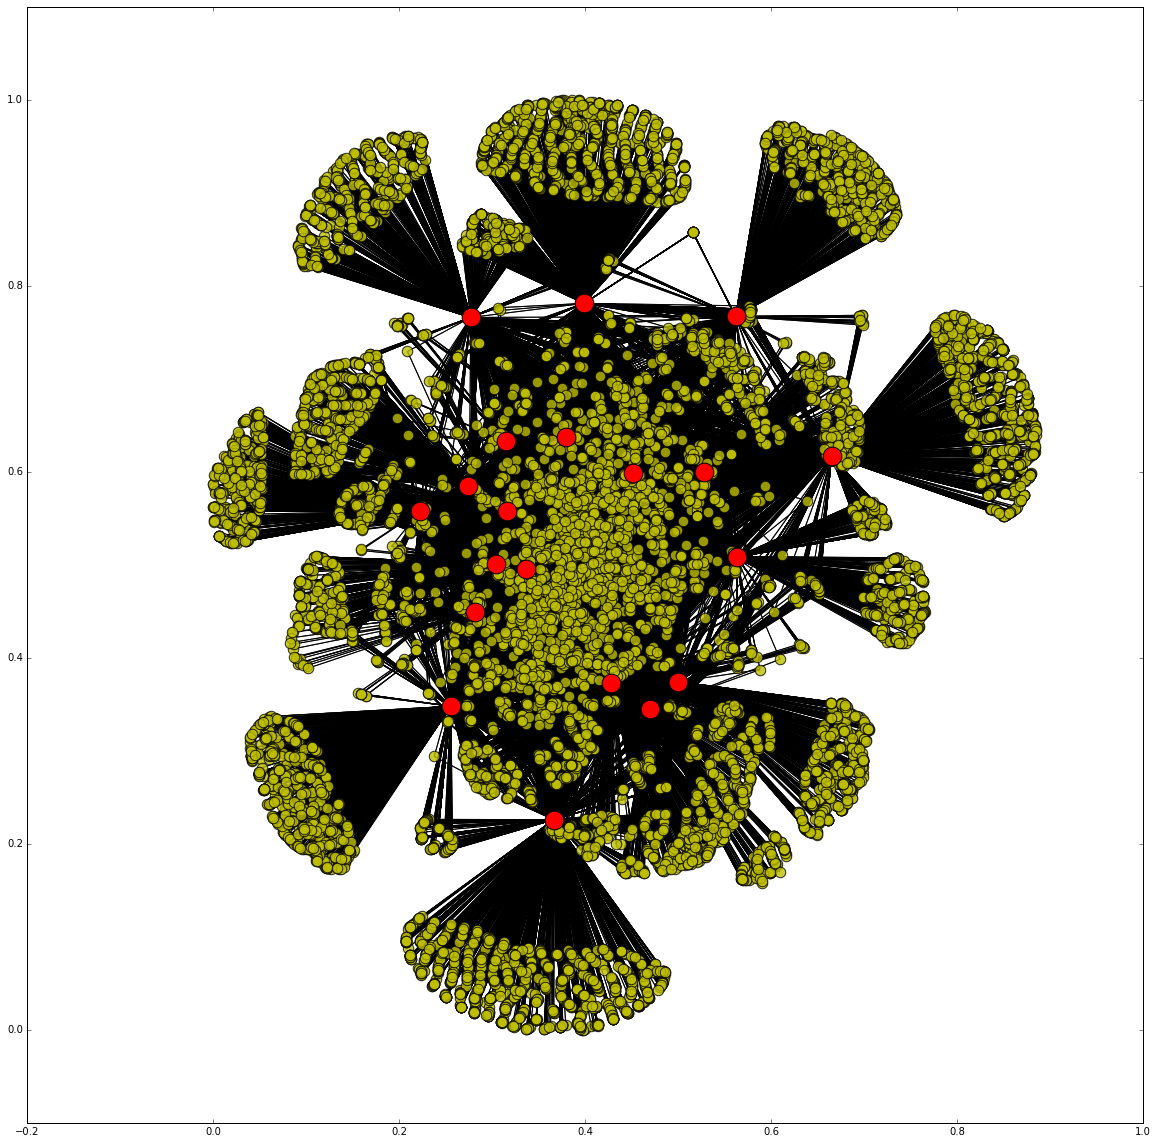

In [21]:
# drawing graph

elite_nodes = []
for i in eliteDf.index:
    elite_nodes.append(eliteDf.loc[i, 'user_id'])
#print elite_nodes

extra_nodes = []
for node in eg.nodes():
    if node not in elite_nodes:
        extra_nodes.append(node)
print len(extra_nodes)

plt.figure(figsize=(20,20))
plt.axis('equal')
pos = nx.spring_layout(eg)
nx.draw_networkx(eg, pos, node_color = 'y', with_labels = False, nodelist=extra_nodes, node_size=110, alpha=0.8)
nx.draw_networkx(eg, pos, node_color = 'r', with_labels = False, nodelist=elite_nodes, node_size=350, aplha=0.8)
plt.savefig('spring_20_elite.png')
plt.show()

In [23]:
# save graph
fh = open("elite_20_adjlist",'wb')
nx.write_adjlist(eg, fh)

"\n# spectral\nplt.figure(figsize=(20,20))\nplt.axis('equal')\nnx.draw_spectral(eg, node_color = 'y', with_labels = False)\nplt.savefig('networkx_20_elite.png')\nplt.show()\n"

In [26]:
# calculating betweenness of each node
betweenness = nx.closeness_centrality(eg)
print 'done'
for i in elite_nodes:
    print betweenness[i]

done
0.341765453006
0.467937106007
0.364961853631
0.507365361197
0.413285549725
0.424073283646
0.465273775216
0.41479863832
0.440578523673
0.441361399672
0.339644472494
0.439783445129
0.464370460919
0.498244801913
0.420593311407
0.510675312352
0.469501999273
0.451434762853
0.405589574501
0.397892856043


"\n# spectral\nelite_nodes = []\nfor i in eliteDf.index:\n    elite_nodes.append(eliteDf.loc[i, 'user_id'])\n\nextra_nodes = []\nfor node in eg.nodes():\n    if node not in elite_nodes:\n        extra_nodes.append(node)\nprint len(extra_nodes)\n\nplt.figure(figsize=(20,20))\nplt.axis('equal')\npos = nx.spring_layout(eg)\nnx.draw_spectral(eg, pos, node_color = 'y', with_labels = False, nodelist=extra_nodes, node_size=110, alpha=0.8)\nnx.draw_spectral(eg, pos, node_color = 'r', with_labels = False, nodelist=elite_nodes, node_size=350, aplha=0.8)\nplt.savefig('spectral_20_elite.png')\nplt.show()\n"

In [31]:
# the betweenness values of elite users found by our classifier is generally high
print sorted(betweenness.values())

[0.253538268260605, 0.253538268260605, 0.253538268260605, 0.253538268260605, 0.253538268260605, 0.253538268260605, 0.253538268260605, 0.253538268260605, 0.253538268260605, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.25471828347171, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2673843287444364, 0.2846438645980254, 0.2846438645980254, 0.2846438645980254, 0.2846438645980254, 0.2846438645980254, 0.2846438645980254, 

## Normal Users

In [36]:
# normal users

normDf = userDf.nsmallest(20000, 'score')
normDf['friends'] = normDf['friends'].apply(lambda x : ast.literal_eval(x))

# creating graph and adding edges
ng = nx.Graph()
# add edges
for i in normDf.index:
    for j in normDf.loc[i,'friends']:
        ng.add_edge(normDf.loc[i,'user_id'], j)
# add nodes
for i in normDf.index:
    ng.add_node(normDf.loc[i,'user_id'])

print len(ng.edges())
print len(ng.nodes())

787
20778


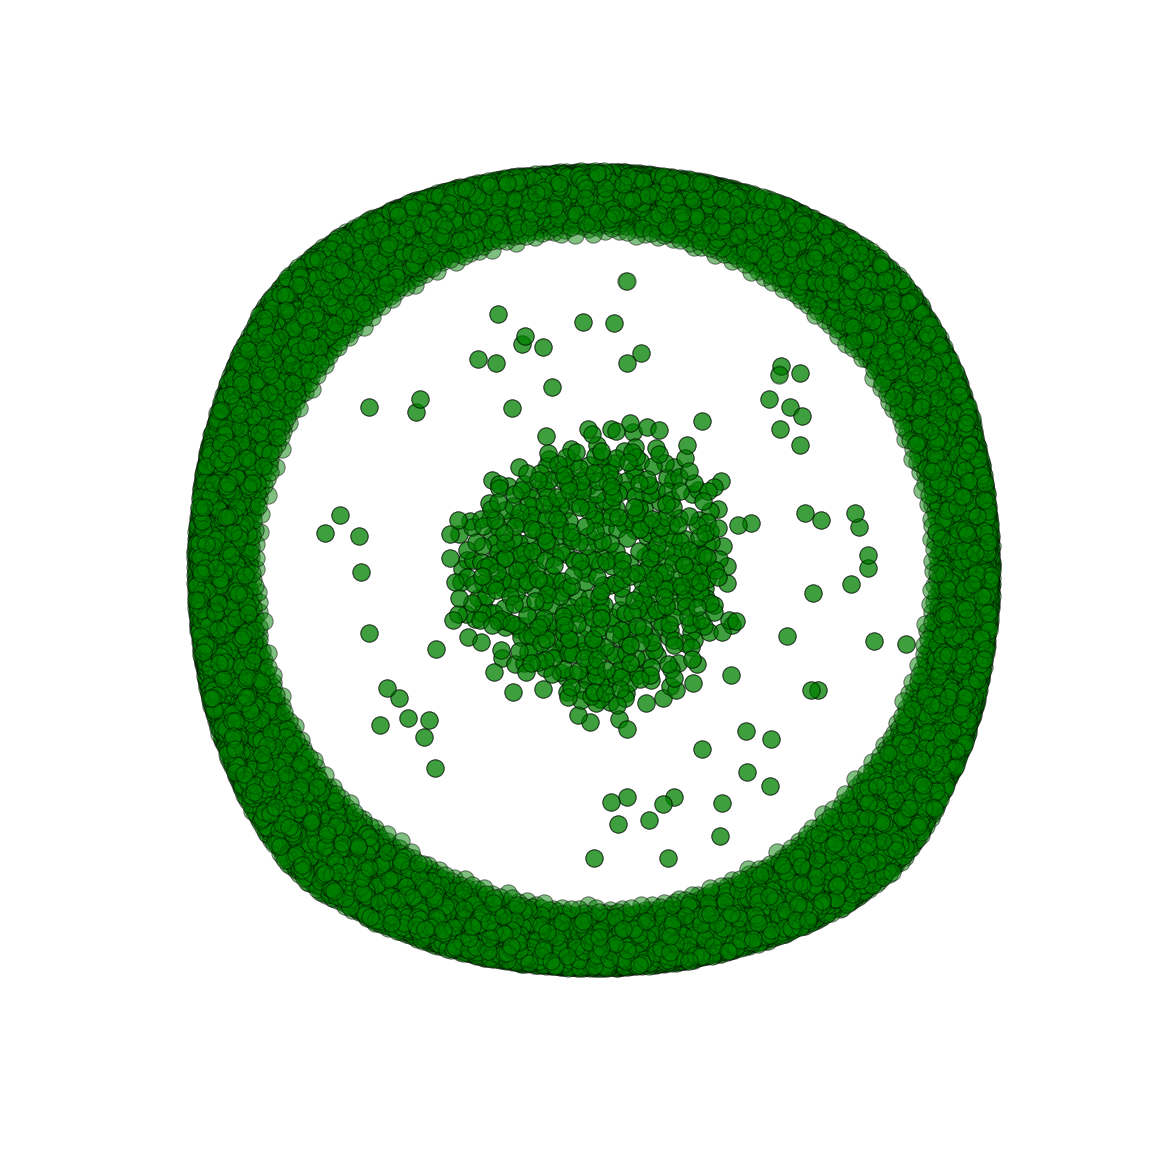

In [39]:
# drawing graph

plt.figure(figsize=(20,20))
plt.axis('equal')
nx.draw_spring(ng, node_color = 'g', with_labels = False, alpha=0.5)
plt.savefig('spring_15000_norm.png')
plt.show()
# the figure shows a very graph that is not well connected